# Import packapages


In [360]:
import numpy as np
import torch
from torch.utils.data import dataset, dataloader
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2

# Reading img

In [339]:
# with tumor 
tumor = []
base_dir = "dataset/brain_tumor_dataset/yes/*.jpg"

for i in glob.iglob(base_dir):
    img = cv2.imread(i)
    img = cv2.resize(img,(128,128)) # tamanho padrão
    b, g, r = cv2.split(img) # transformando formato bgr para rgb
    img = cv2.merge([r, g, b])
    img = img.astype(np.float32) / 255.0  # Normaliza para o intervalo [0, 1]
    tumor.append(img)
    

In [338]:
 # with health
healthy = []
base_dir = "dataset/brain_tumor_dataset/no/*.jpg"


for i in glob.iglob(base_dir):
    img = cv2.imread(i)
    img = cv2.resize(img,(128,128)) # tamanho padrão
    b, g, r = cv2.split(img) # transformando formato bgr para rgb
    img = cv2.merge([r, g, b])
    img = img.astype(np.float32) / 255.0  # Normaliza para o intervalo [0, 1]
    
    healthy.append(img)
    

In [321]:
len(tumor)


154

In [322]:
len(healthy)

91

In [323]:
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [324]:
for img in healthy:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [340]:
# juntar ambos
healthy = np.array(healthy)
tumor = np.array(tumor)
all = np.concatenate((tumor, healthy))


In [326]:
all.shape

(245, 128, 128, 3)

# Visualizing images


(128, 128, 3)

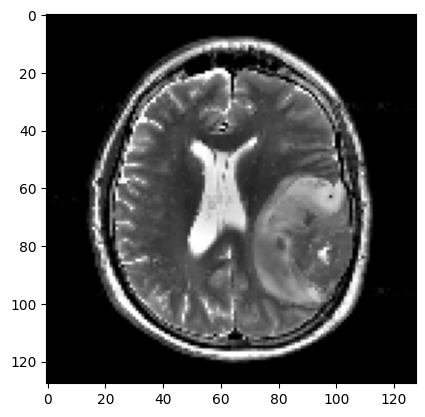

In [361]:
plt.imshow(tumor[10])
tumor[0].shape

In [328]:
# pegar 5 imagens aleatorias e exibir
def plot_image(healthy,tumor, num=5):
    healthy_img = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_img = tumor[np.random.choice(tumor.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range (num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_img[i])

    plt.figure(figsize=(16,9))
    for i in range (num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor_img[i])

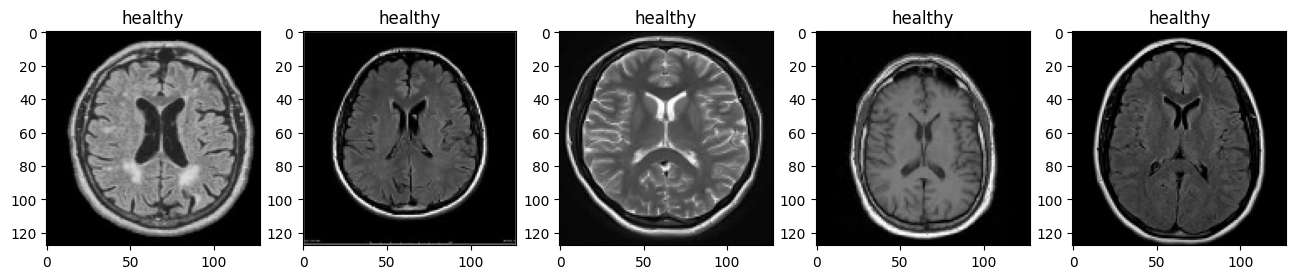

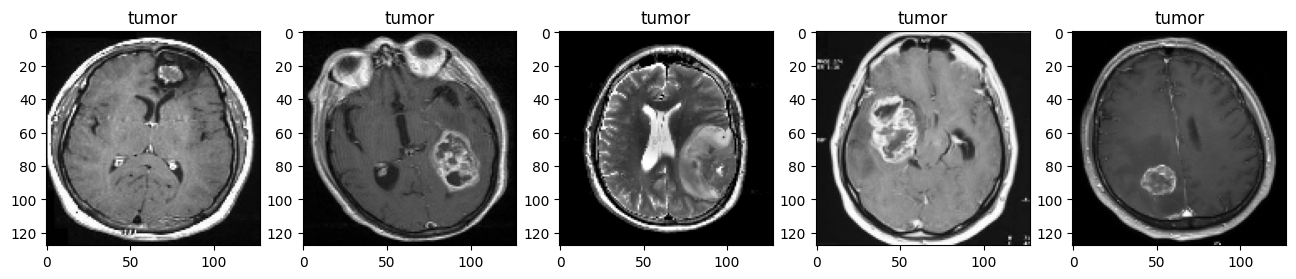

In [329]:
plot_image(healthy,tumor, num=5)

# create a model



In [330]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_modelo = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2,stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2,stride=5))

        self.fc_model == nn.Sequential(
            nn.Linear(in_features=256, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=1),
        )
        
        


# dividir dataset


In [354]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Diretórios do dataset original e de saída
dataset_dir = 'dataset/brain_tumor_dataset'  
base_dir = 'dataset/Split_dataset'  

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Criar os diretórios base, de treino e de validação
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Função para copiar e dividir as imagens em treino e test
def splitCopy(class_name):
    class_dir = os.path.join(dataset_dir, class_name)  
    all_files = os.listdir(class_dir)  

    # Dividir os arquivos em treino e test
    train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

    # Criar diretórios para treino e test da classe
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copiar os arquivos para o diretório de treino
    for file_name in train_files:
        src = os.path.join(class_dir, file_name)
        dst = os.path.join(train_class_dir, file_name)
        shutil.copyfile(src, dst)

    # Copiar os arquivos para o diretório de validação
    for file_name in test_files:
        src = os.path.join(class_dir, file_name)
        dst = os.path.join(test_class_dir, file_name)
        shutil.copyfile(src, dst)

# Classes do seu dataset
classes = ['yes', 'no']  # 'yes' para imagens com tumor e 'no' para imagens saudáveis

# Executar a divisão para cada classe
for class_name in classes:
    splitCopy(class_name)

print("Processo de divisão concluído!")


Processo de divisão concluído!


In [362]:
import os 

dataset_dir = os.path.join(os.getcwd(), 'dataset/Split_dataset')

# Diretórios de treino e teste
dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_test_dir = os.path.join(dataset_dir, 'test')

# Função para visualizar a quantidade de imagens
def quantidade(train_no_len, train_yes_len, test_no_len, test_yes_len):
    print('Train no:', train_no_len)
    print('Train yes:', train_yes_len)
    print('test no:', test_no_len)
    print('test yes:', test_yes_len)

# Contar a quantidade de imagens para cada classe
dataset_train_no_len = len(os.listdir(os.path.join(dataset_train_dir, 'no')))
dataset_train_yes_len = len(os.listdir(os.path.join(dataset_train_dir, 'yes')))
dataset_test_no_len = len(os.listdir(os.path.join(dataset_test_dir, 'no')))
dataset_test_yes_len = len(os.listdir(os.path.join(dataset_test_dir, 'yes')))

# Chamar a função para exibir as quantidades
quantidade(dataset_train_no_len, dataset_train_yes_len, dataset_test_no_len, dataset_test_yes_len)

Train no: 78
Train yes: 124
test no: 20
test yes: 31


# treinamento resnet

In [379]:
import os
import glob
import cv2
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torchvision.models as models
import torch.nn as nn

class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx])  # Carregando a imagem
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertendo de BGR para RGB
        if self.transform:
            img = self.transform(img)  # Aplicando transformações, se houver
        label = self.labels[idx]  # Obtendo o rótulo
        return img, label

# Diretórios de imagens
dataset_train_dir = 'C:/Users/Romario Santos/Documents/redeNeural/dataset/Split_dataset/train'

# Definindo as variáveis para armazenar os caminhos das imagens e os rótulos
image_paths_train = []
labels_train = []

# Obtendo as imagens e os rótulos das classes
base_dir_yes = os.path.join(dataset_train_dir, 'yes/*.jpg')
base_dir_no = os.path.join(dataset_train_dir, 'no/*.jpg')

for img_path in glob.glob(base_dir_yes):
    image_paths_train.append(img_path)
    labels_train.append(1)  # Rótulo para 'yes'

for img_path in glob.glob(base_dir_no):
    image_paths_train.append(img_path)
    labels_train.append(0)  # Rótulo para 'no'

# Definindo transformações
transform = transforms.Compose([
    transforms.ToPILImage(),  # Converte a imagem para PIL (se necessário)
    transforms.Resize((224, 224)),  # Redimensiona a imagem
    transforms.ToTensor(),  # Converte a imagem para um tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normaliza
])

# Criando a instância do dataset
train_dataset = CustomDataset(image_paths_train, labels_train, transform=transform)

# Criando o DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Carregando a ResNet pré-treinada
resnet = models.resnet18(pretrained=True)

# Congelando as camadas iniciais para não atualizar seus pesos
for param in resnet.parameters():
    param.requires_grad = False

# Alterando a última camada para se ajustar ao seu problema
num_features = resnet.fc.in_features
resnet.fc = nn.Linear(num_features, 1)  # Saída binária: 1 ou 0 (tumor ou não)

# Definindo a função de perda e o otimizador
criterion = nn.BCEWithLogitsLoss()  # Para saída binária
optimizer = torch.optim.Adam(resnet.parameters(), lr=0.001)

# Treinamento do modelo
resnet.train()

# Se você estiver usando uma GPU, mova o modelo para a GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet.to(device)

num_epochs = 10  
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move para GPU

        optimizer.zero_grad()  
        outputs = resnet(images)  
        
        # Aplicando a função sigmoid e convertendo para 0 ou 1
        preds = torch.round(torch.sigmoid(outputs))  # Converte a saída para 0 ou 1
        correct += (preds == labels.view_as(preds)).sum().item()  # Contando acertos
        total += labels.size(0)  # Total de exemplos

        # Ajustando os rótulos
        loss = criterion(outputs, labels.float().unsqueeze(1))  # Adiciona uma dimensão aos rótulos
        loss.backward()  # Retropropagação
        optimizer.step()  # Atualiza os pesos

    accuracy = correct / total * 100
    print(f'Época [{epoch + 1}/{num_epochs}], Perda: {loss.item():.4f}, Acurácia: {accuracy:.2f}%')

# Salvando o modelo
torch.save(resnet.state_dict(), 'resnet_model.pth')
print("Modelo salvo com sucesso!")


Época [1/10], Perda: 0.6140, Acurácia: 67.35%
Época [2/10], Perda: 0.6625, Acurácia: 66.84%
Época [3/10], Perda: 0.5440, Acurácia: 70.92%
Época [4/10], Perda: 0.6123, Acurácia: 73.47%
Época [5/10], Perda: 0.7308, Acurácia: 80.61%
Época [6/10], Perda: 0.5327, Acurácia: 81.63%
Época [7/10], Perda: 0.4531, Acurácia: 81.63%
Época [8/10], Perda: 0.3607, Acurácia: 78.57%
Época [9/10], Perda: 0.4250, Acurácia: 82.14%
Época [10/10], Perda: 0.5811, Acurácia: 90.82%
Modelo salvo com sucesso!


# modelo resnet no conjunto test

C:\Users\Romario Santos\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Romario Santos\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


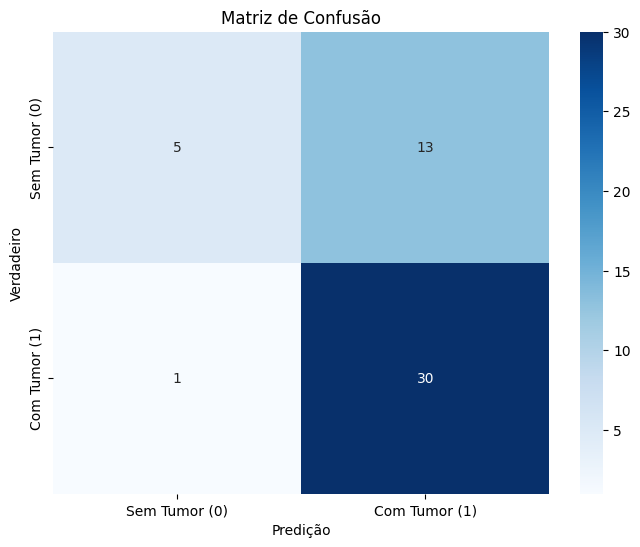

Acurácia: 0.71
Precisão: 0.70
Recall: 0.97
F1 Score: 0.81


In [386]:
import os
import cv2
import glob
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx])  # Lê a imagem
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converte de BGR para RGB
        img = Image.fromarray(img)  # Converte numpy.ndarray para PIL Image
        if self.transform:
            img = self.transform(img)  # Aplicando transformações, se houver
        label = self.labels[idx]  # Obtendo o rótulo
        return img, label

# Defina as transformações
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensiona as imagens
    transforms.ToTensor(),  # Converte a imagem PIL em um tensor
])

# Caminhos para as imagens de teste
base_test_dir = "dataset/Split_dataset/test"
yes_test_dir = os.path.join(base_test_dir, "yes/*.jpg")
no_test_dir = os.path.join(base_test_dir, "no/*.jpg")

# Cria listas para armazenar imagens e rótulos
test_image_paths = []
test_labels = []

# Carrega imagens com tumor
for img_path in glob.glob(yes_test_dir):
    test_image_paths.append(img_path)
    test_labels.append(1)  # Rótulo 1 para "com tumor"

# Carrega imagens sem tumor
for img_path in glob.glob(no_test_dir):
    test_image_paths.append(img_path)
    test_labels.append(0)  # Rótulo 0 para "sem tumor"

# Crie a instância do dataset de teste
test_dataset = CustomDataset(test_image_paths, test_labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Recrie a mesma arquitetura do modelo
resnet = models.resnet18(pretrained=True)

# Alterando a última camada novamente para adequar ao seu problema
num_classes = 1  # Para classificação binária
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# Carregando os pesos do modelo
resnet.load_state_dict(torch.load('resnet_model.pth'))

# Colocando o modelo em modo de avaliação
resnet.eval()

correct = 0
total = 0

all_preds = []
all_labels = []

with torch.no_grad():  # Desativa o cálculo do gradiente
    for images, labels in test_loader:
        outputs = resnet(images)  # Passa as imagens pela ResNet
        preds = torch.round(torch.sigmoid(outputs))  # Converte a saída para 0 ou 1

        all_preds.extend(preds.view(-1).numpy())  # Adiciona as previsões
        all_labels.extend(labels.numpy())  # Adiciona os rótulos verdadeiros

# Calculando a matriz de confusão
cm = confusion_matrix(all_labels, all_preds)

# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Tumor (0)', 'Com Tumor (1)'], yticklabels=['Sem Tumor (0)', 'Com Tumor (1)'])
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Calcular a acurácia
accuracy = accuracy_score(all_labels, all_preds)

# Calcular a precisão
precision = precision_score(all_labels, all_preds)

# Calcular o recall
recall = recall_score(all_labels, all_preds)

# Calcular o F1-score
f1 = f1_score(all_labels, all_preds)

# Exibir todos os resultados
print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


# em imagem única

C:\Users\Romario Santos\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Romario Santos\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


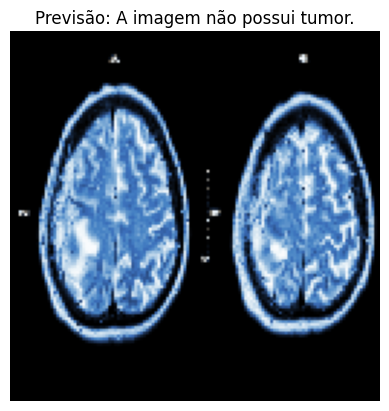

In [387]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

# Defina suas transformações
transform = transforms.Compose([
    transforms.ToPILImage(),  # Converte um tensor para uma imagem PIL
    transforms.Resize((128, 128)),  # Redimensiona para o tamanho do seu modelo
    transforms.ToTensor(),  # Converte a imagem para um tensor
])

# Função para carregar e prever uma única imagem
def predict_image(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)
    
    # Verifica se a imagem foi carregada corretamente
    if image is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        return
    
    # Converte BGR para RGB e redimensiona a imagem
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converte BGR para RGB
    image = cv2.resize(image, (128, 128))  # Redimensiona a imagem
    
    # Aplica as transformações
    image_tensor = transform(image)  # Aplica as transformações
    image_tensor = image_tensor.unsqueeze(0)  # Adiciona uma dimensão extra para o batch

    # Recrie a mesma arquitetura do modelo
    resnet = models.resnet18(pretrained=True)

    # Alterando a última camada novamente para adequar ao seu problema
    num_classes = 1  # Para classificação binária
    resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

    # Carregando os pesos do modelo
    resnet.load_state_dict(torch.load('resnet_model.pth'))

    # Colocando o modelo em modo de avaliação
    resnet.eval()

    with torch.no_grad():
        outputs = resnet(image_tensor)  # Passa a imagem pelo modelo
        
        # Aplicando a função sigmoid e arredondando para 0 ou 1
        preds = torch.round(torch.sigmoid(outputs))  # Converte a saída para 0 ou 1

        # Determina a label com base na previsão
        if preds.item() == 1:
            label = "A imagem possui tumor."
        else:
            label = "A imagem não possui tumor."

        # Plotar a imagem com a previsão
        plt.imshow(image)
        plt.title(f'Previsão: {label}')
        plt.axis('off')  # Remove os eixos
        plt.show()

# Caminho absoluto para a imagem de teste
image_path = "C:/Users/Romario Santos/Downloads/cerebro-1.jpg"  # Substitua pelo seu caminho absoluto
predict_image(image_path)


# no conjunto de teste

C:\Users\Romario Santos\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Romario Santos\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


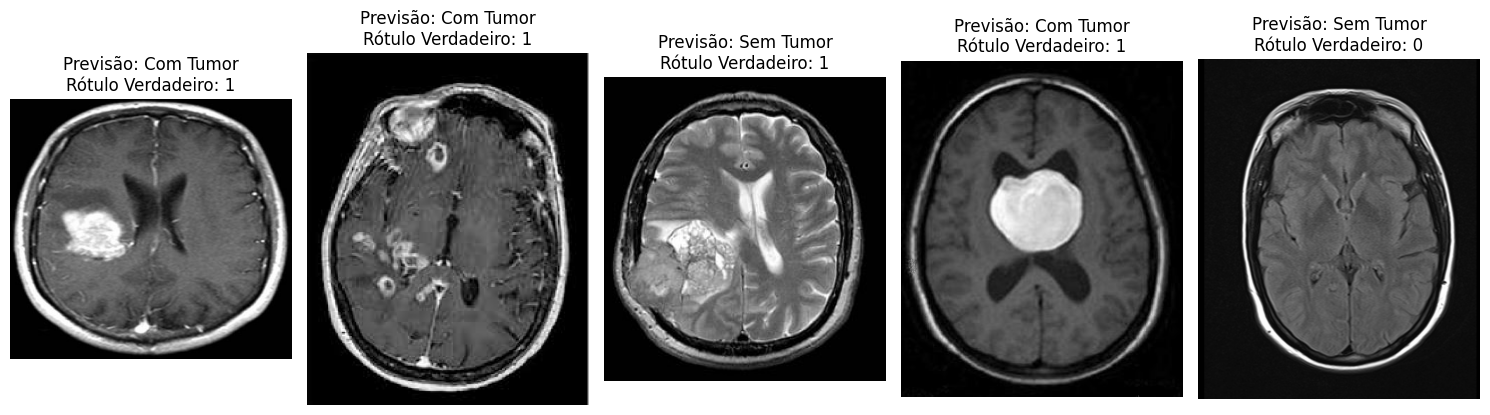

Acurácia: 80.00%


In [414]:
import os
import cv2
import glob
import random
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score

# Defina suas transformações
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Redimensiona para o tamanho do seu modelo
    transforms.ToTensor(),  # Converte a imagem para um tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

# Caminhos para as imagens de teste
base_test_dir = "dataset/Split_dataset/test"
yes_test_dir = os.path.join(base_test_dir, "yes/*.jpg")
no_test_dir = os.path.join(base_test_dir, "no/*.jpg")

# Carrega todas as imagens com e sem tumor
test_image_paths = glob.glob(yes_test_dir) + glob.glob(no_test_dir)

# Recrie a mesma arquitetura do modelo
resnet = models.resnet18(pretrained=True)

# Alterando a última camada para adequar ao seu problema
num_classes = 1  # Para classificação binária
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# Carregando os pesos do modelo
resnet.load_state_dict(torch.load('resnet_model.pth'))

# Colocando o modelo em modo de avaliação
resnet.eval()

# Função para prever uma única imagem
def predict_image(image_tensor):
    with torch.no_grad():
        outputs = resnet(image_tensor.unsqueeze(0))  # Passa a imagem pelo modelo
        preds = torch.round(torch.sigmoid(outputs))  # Converte a saída para 0 ou 1
        return preds.item()


# Seleciona aleatoriamente 5 imagens do conjunto de teste
random_images = random.sample(test_image_paths, 5)

# Inicializa listas para armazenar imagens e rótulos
images_to_show = []
predictions = []
true_labels = []

# Itera sobre as imagens selecionadas
for image_path in random_images:
    # Carregar e preparar a imagem
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converte BGR para RGB
    image_resized = cv2.resize(image, (128, 128))  # Redimensiona a imagem

    # Converte a imagem numpy para PIL
    image_pil = Image.fromarray(image_resized)

    # Aplica as transformações
    image_tensor = transform(image_pil)

    # Faz a previsão
    prediction = predict_image(image_tensor)
    predictions.append(prediction)

    # Adiciona a imagem para exibição
    images_to_show.append(image)

    # Extrai o rótulo verdadeiro (1 se for da pasta "yes", 0 se for da pasta "no")
    true_label = 1 if "yes" in image_path else 0
    true_labels.append(true_label)

# Defina o número de colunas desejado
num_cols = 5
num_rows = len(images_to_show) // num_cols + (len(images_to_show) % num_cols > 0)

# Plotar as imagens com as previsões e rótulos verdadeiros
plt.figure(figsize=(15, 10))
for i, (img, pred, true) in enumerate(zip(images_to_show, predictions, true_labels)):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    plt.title(f'Previsão: {"Com Tumor" if pred == 1 else "Sem Tumor"}\nRótulo Verdadeiro: {true}')
    plt.axis('off')  # Remove os eixos

plt.tight_layout()
plt.show()
# Calcular a acurácia
accuracy = accuracy_score(true_labels, predictions)
# Exibir todos os resultados
print(f'Acurácia: {accuracy * 100:.2f}%')

